In [ ]:
## Proyecto de regresion lineal y sus usos en analisis de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [ ]:
df = pd.read_csv('data_marketing.csv')
df

,Unnamed: 0,youtube,facebook,newspaper,sales
0,1,276.12,45.36,83.04,26.52
1,2,53.40,47.16,54.12,12.48
2,3,20.64,55.08,83.16,11.16
3,4,181.80,49.56,70.20,22.20
4,5,216.96,12.96,70.08,15.48
...,...,...,...,...,...
195,196,45.84,4.44,16.56,9.12
196,197,113.04,5.88,9.72,11.64
197,198,212.40,11.16,7.68,15.36
198,199,340.32,50.40,79.44,30.60


In [ ]:
#Limpieza parcial del documento para mejor analisis
df= df[['youtube', 'facebook', 'newspaper', 'sales']]
df

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48
...,...,...,...,...
195,45.84,4.44,16.56,9.12
196,113.04,5.88,9.72,11.64
197,212.40,11.16,7.68,15.36
198,340.32,50.40,79.44,30.60


In [ ]:
## Regresion lineal multiple

In [ ]:
# fit regression model
fit_sales = smf.ols('sales ~ youtube + facebook + newspaper', data=df).fit()
fit_sales

,youtube,facebook,newspaper,sales
youtube,1.000000,0.054809,0.056648,0.782224
facebook,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


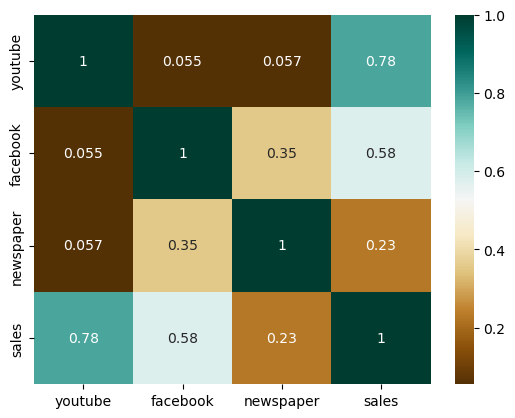

In [ ]:
corr = df.corr()
sns.heatmap(corr,cmap="BrBG",annot=True)
corr

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(fit_sales.resid)
print(f'Estadístico de Durbin-Watson: {dw_stat:.4f}')

Estadístico de Durbin-Watson: 2.0836


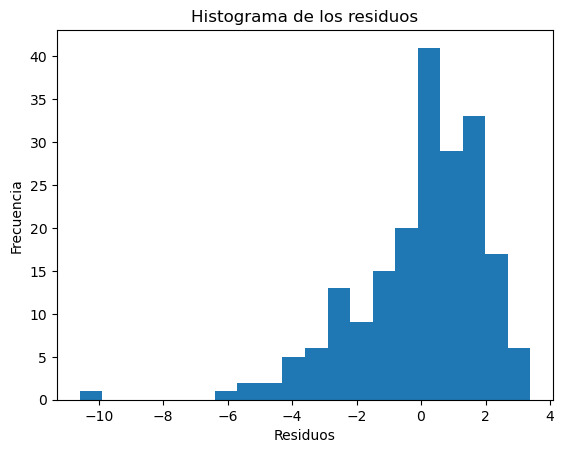

In [ ]:
# Extraer residuos
residuos = fit_sales.resid

# Crear DataFrame
res_df = pd.DataFrame({'residuos': residuos})

# Graficar histograma
plt.hist(res_df['residuos'], bins=20)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los residuos')
plt.show()

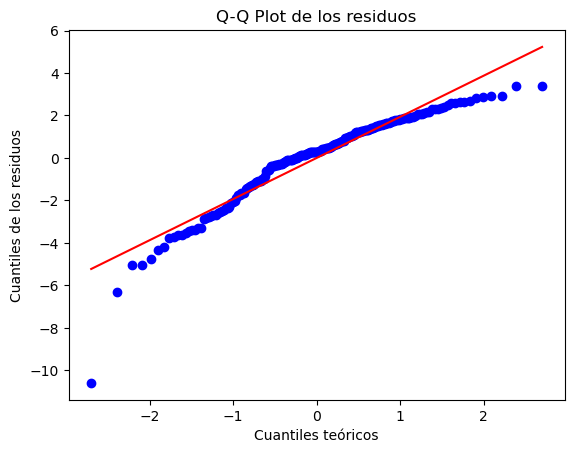

In [ ]:
# Q-Q Plot
stats.probplot(res_df['residuos'], dist="norm", plot=plt)
plt.title("Q-Q Plot de los residuos")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles de los residuos")
plt.show()

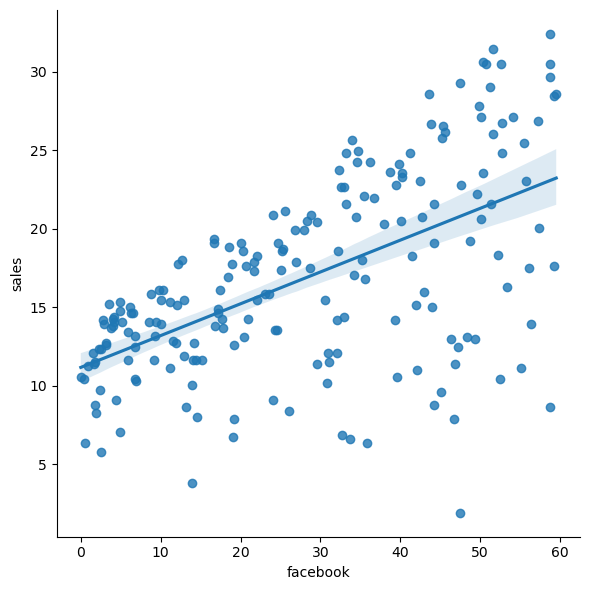

In [ ]:
plot = sns.lmplot(x = "facebook", y = "sales", height = 6, data = df)

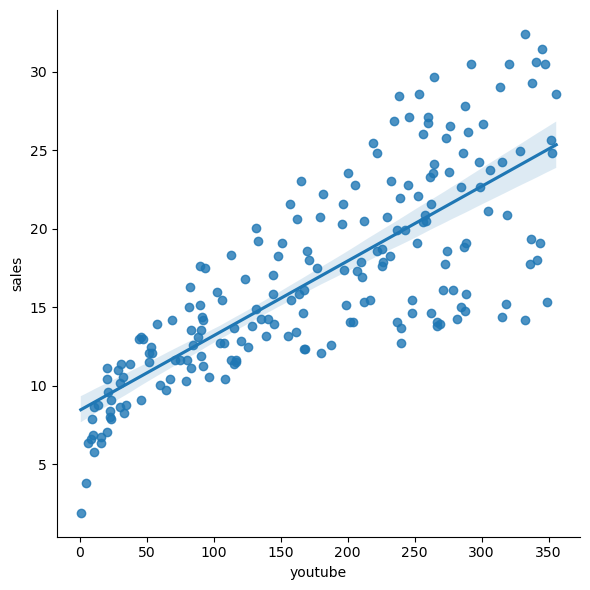

In [ ]:
plot = sns.lmplot(x = "youtube", y = "sales", height = 6, data = df)

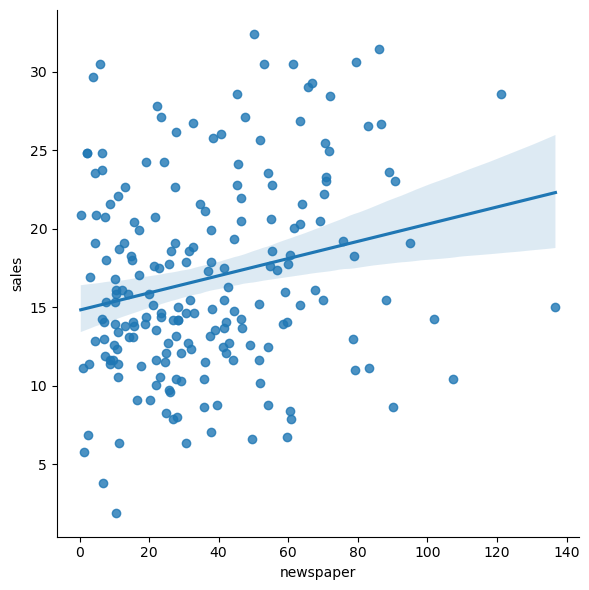

In [ ]:
plot = sns.lmplot(x = "newspaper", y = "sales", height = 6, data = df)

In [ ]:
# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value']

# Get the test result
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test_result)

[('Lagrange multiplier statistic', np.float64(36.64580517401961)),
 ('p-value', np.float64(1.4166353247317337e-09))]

In [ ]:
print(fit_sales.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 09 Aug 2025   Prob (F-statistic):           1.58e-96
Time:                        12:26:07   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5267      0.374      9.422      0.0

In [ ]:
# Interpretando los resultados de la regresion lineal:
##Independencia entre las obsevaciones Si -  La relacion de las variables independientes va de moderada a debil lo cual nos sirve
##Normalidad de los residuos: No - No hay normalidad en los residuos
##Linealidad Si* Excepto Newspaper
##Homocedasticidad Si (p-value mayor a 0.05)

#P - values
## p-value youtube: variable estadisticamente significativa para el modelo
## p-value facebook: variable estadisticamente significativa para el modelo
## p-value newspaper: variable estadisticamente no significativa para el modelo

# Coeficiente (Necesitan ser numeros postivos para confirmar que el impacto es correcto en el modelo)
## youtube Coeficiente positivo - influencia positiva sobre la variable dependiente
## facebook Coeficiente positivo - influencia positiva sobre la variable dependiente
## newspaper Coeficiente negativo - influencia negativa sonbre la variable dependiente

In [ ]:
# Como conclusion me parece que el modelo es solido y confiable. Las variables Facebook y Youtube tienen un impacto positivo y significativo en las ventas
# no tanto asi newspaper que no aporta tanto valor estadistico